In [1]:
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Loading

In [2]:
batch_size = 12

train_data = datasets.MNIST('', train=True, download=False, transform = transforms.ToTensor())
test_data = datasets.MNIST('', train=False, download=False, transform = transforms.ToTensor())

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size)

# Model

In [3]:
class DNN(nn.Module):
    def __init__(self, hidden_units = [512, 256, 128, 64]):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        self.hidden_units = hidden_units
        
        # nn.ModuleList 이용
        linear_layers = []
        linear_layers.append(nn.Linear(self.in_dim, self.hidden_units[0]))
        for i in range(len(hidden_units)-1):
            linear_layers.append(nn.Linear(hidden_units[i], hidden_units[i+1]))
        linear_layers.append(nn.Linear(hidden_units[-1], self.out_dim))
       
        self.linear_layers = nn.ModuleList(linear_layers)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, self.in_dim)
        for layer in range(len(self.linear_layers)):
            z = self.linear_layers[layer](x)
            if layer == len(self.linear_layers)-1:
                logit = z
            else :
                x = self.relu(z)
        return logit

# Train

In [4]:
def Train(model):
    
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs , labels = data
        
            optimizer.zero_grad()
        
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
            running_loss+=loss.item()
            if (i+1)%2000 == 0:
                print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
                running_loss = 0.0
            
    print("Finished Training")
    print()

# Test

In [5]:
def Test(model):
    n_predict = 0
    n_correct = 0

    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
    
        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()
        
    accuracy = (n_correct/n_predict).item()
    
    print(f"{n_correct}/{n_predict}")
    print(f"Accuracy: {accuracy:.3f}")
    print()
    
    return accuracy

# Accuracy vs #Layers

-------------------- 2 layer --------------------
[1,  2000] loss: 1.044
[1,  4000] loss: 0.362
[2,  2000] loss: 0.276
[2,  4000] loss: 0.239
[3,  2000] loss: 0.192
[3,  4000] loss: 0.174
[4,  2000] loss: 0.149
[4,  4000] loss: 0.134
[5,  2000] loss: 0.114
[5,  4000] loss: 0.110
[6,  2000] loss: 0.092
[6,  4000] loss: 0.093
[7,  2000] loss: 0.076
[7,  4000] loss: 0.078
[8,  2000] loss: 0.066
[8,  4000] loss: 0.066
[9,  2000] loss: 0.057
[9,  4000] loss: 0.054
[10,  2000] loss: 0.051
[10,  4000] loss: 0.047
Finished Training

9757/10000
Accuracy: 0.976


-------------------- 3 layer --------------------
[1,  2000] loss: 1.426
[1,  4000] loss: 0.399
[2,  2000] loss: 0.274
[2,  4000] loss: 0.218
[3,  2000] loss: 0.166
[3,  4000] loss: 0.153
[4,  2000] loss: 0.119
[4,  4000] loss: 0.110
[5,  2000] loss: 0.088
[5,  4000] loss: 0.086
[6,  2000] loss: 0.068
[6,  4000] loss: 0.076
[7,  2000] loss: 0.058
[7,  4000] loss: 0.058
[8,  2000] loss: 0.047
[8,  4000] loss: 0.048
[9,  2000] loss: 0.037

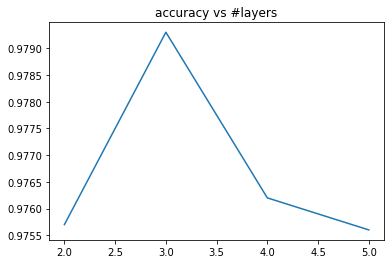

In [6]:
hidden_units_list = [[512, 256], [512, 256, 128], [512, 256, 128, 64], [512, 256, 128, 64, 32]] # (2,3,4,5 layers)
accuracy_list = []

for i in range(len(hidden_units_list)):
    
    model = DNN(hidden_units_list[i])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.01)
    
    print('--------------------', i+2, 'layer --------------------')
    Train(model)
    accuracy_list.append(Test(model))
    print()
    
plt.figure()
plt.title("accuracy vs #layers")
x = np.arange(0, len(accuracy_list))
plt.plot(x+2, accuracy_list)